# Assignment 1 
### Neural Networks and Fuzzy Logic (2nd Semester 2019-2020)

### Instructions:
This assignment is designed to check your understanding of linear algebra, assuming you have basic knowlegde of Linear Algebra, this assignment will introudce you to some high level tasks in Linear Algebra, and what's the fun part about it? You'll be implemnting those concepts and visualizing them!! So Let's start.

#### Key Concepts: Matrix Inverse, Linear Transforms, Eigendecomposition and all the interesting stuff Linear Algebra has :)

##### Please make sure you adhere to the policy of originality of your work, the assignment should reflect your understanding and should be your original, cases of plagiarism will be strictly dealt with as per institute norms. The penalties can include debarrment from the course and registration for the next semester.

# Matrices as linear transformations

Matrices can be viewed as linear transformations you 'apply' to vectors. Some matrices will rotate your space, others will rescale it etc. So when we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we 'apply' the matrix to the vector it means that we calculate the dot product of the matrix with the vector. We will start with a basic example of this kind of transformation.

In [6]:
#No other imports are allowed !!!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
#utility function, please don't alter this
def plot_vectors(vectors, cols, alpha=1):
    """
    Plot set of vectors.
    Parameters
    ----------
    vectors : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['green', 'red'] will display the
        first vector in green and the second in red.
    alpha : float
        Opacity of vectors
    Returns:
    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vectors)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

In [8]:
A = np.array([[1, 3], [2, 6]])
print(A)
print(A.shape)

[[1 3]
 [2 6]]
(2, 2)


In [9]:
v = np.array([[5], [3]])
print(v)
print(v.shape)

[[5]
 [3]]
(2, 1)


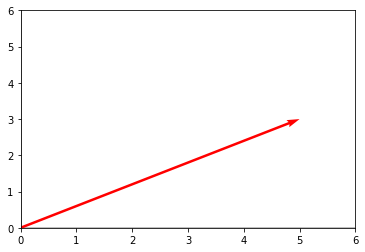

In [10]:
plot_vectors([v.flatten()],['red'])
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.show()

**Inline Question**: did you see that v is flattened before plotting? why do we need to do that? Check out the code for plot_vectors and try to answer this? <br>

YOUR ANSWER HERE

In [11]:
def apply_linear_transform(A,v):
    '''
    Apply the linear transformation on v by a matrix A
    return the transformed matrix (Av)
    '''
    # YOUR CODE HERE
    transformed_matrix = A.dot(v)
    return transformed_matrix

In [12]:
#DO NOT ALTER THIS CELL
#HIDDEN TEST CASES FOR apply_linear_transform

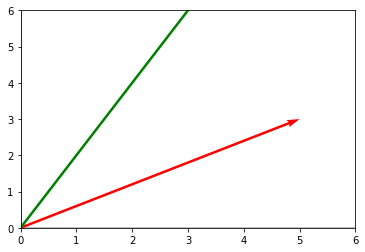

In [13]:

# Let us visualize the transformation on vector v by a matrix A as mentioned above
transformed_vector = apply_linear_transform(A,v)
plot_vectors([v.flatten(), transformed_vector.flatten()],cols=['red','green'])
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.show()

## Eigendecomposition

We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial vector gives us a new vector that has the exact same direction. The scale can be different but the direction is the same. Applying the matrix didn't change the direction of the vector. This special vector is called an eigenvector of the matrix. We will see that finding the eigenvectors of a matrix can be very useful.

<span class='pquote'>
    Imagine that the transformation of the initial vector by the matrix gives a new vector with the exact same direction. This vector is called an eigenvector of ${A}$.
</span>

This means that ${v}$ is a eigenvector of ${A}$ if ${v}$ and ${Av}$ are in the same direction or to rephrase it if the vectors ${Av}$ and ${v}$ are parallel. The output vector is just a scaled version of the input vector. This scalling factor is $\lambda$ which is called the **eigenvalue** of ${A}$.

$$
{Av} = \lambda{v}
$$

Talking in terms of eigen values and eigen vector the eigen decomposition of a matrix looks like the following:

$$
{A}= {V}\cdot{diag}({\lambda})\cdot{V}^{-1}
$$

We will also verify this property of eigendecomposition.

Eigen decomposition is a crucial step for PCA (introduced later)

Let's begin!!

In [14]:
def find_eigen_decomposition(matrix):
    '''
    use numpy to find the eigen decomposition of the matrix
    returns eigenValues and the eigenVectors
    '''
    # YOUR CODE HERE
    #print(np.linalg.eig(matrix))
    eigenval, eigenvec = np.linalg.eig(matrix)
    return eigenval, eigenvec

In [15]:
#DO NOT ALTER THIS CELL
#HIDDEN TEST CASES FOR find_eigen_decomposition


In [16]:
def verify_eigen_decomposition(matrix,eigen_values,eigen_vectors):
    
    '''
    verify the eigen decomposition property of matrix
    return the recontsructed matrix using the property of eigen vectors and eigenvalues
    '''
    # YOUR CODE HERE
    eigen_vec_inverse = np.linalg.inv(eigen_vectors)
    diagonal_eigen_val = np.diag(eigen_values)
    reconstruct_matrix = eigen_vectors.dot(diagonal_eigen_val).dot(eigen_vec_inverse)
    return reconstruct_matrix

In [17]:
print(np.linalg.eig(A))

(array([0., 7.]), array([[-0.9486833 , -0.4472136 ],
       [ 0.31622777, -0.89442719]]))


In [18]:
#DO NOT ALTER THIS CELL
#HIDDEN TEST CASES FOR verify_eigen_decomposition


## Principal Component Analysis
Handling Dimensions is very important in Machine Leanring. The dimensions are all the features of the dataset. For instance, if you are looking at a dataset containing pieces of music, dimensions could be the genre, the length of the piece, the number of instruments, the presence of a singer etc. You can imagine all these dimensions as different columns. When there is only two dimensions, it is very convenient to plot: you can use the $x$ - and  $y$ -axis. Add color and you can represent a third dimension. It is similar if you have tens or hundereds of dimensions, it will just be harder to visualize it.

When you have that many dimensions it happens that some of them are correlated. For instance, we can reasonably think that the genre dimension will correlate with the instruments dimensions in our previous example. One way to reduce dimensionality is simply to keep only some of them. The problem is that you loose good information. It would be nice to have a way to reduce these dimensions while keeping all the information present in the data set.

The aim of principal components analysis (PCA) is generaly to reduce the number of dimensions of a dataset where dimensions are not completly decorelated. PCA provides us with a new set of dimensions, the principal components (PC).

Step-wise PCA is:

1) Center the data <br>
2) Find the covariance matrix <br>
3) Find the Eigen Decompostion <br>
4) Choose the principal components <br>
5) Find the new dataset Matrix <br>

Following [article](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) also explains PCA very well.
Let's implement PCA to get an essence of how dimensions can be reduced, you need to implement the function one by one!

In [19]:

x = 5*np.random.rand(100)
y = 2*x + 1 + np.random.randn(100)

#the two dimensions of our dataset
x = x.reshape(100, 1)
y = y.reshape(100, 1)

#The dataset matrix
X = np.hstack([x, y])

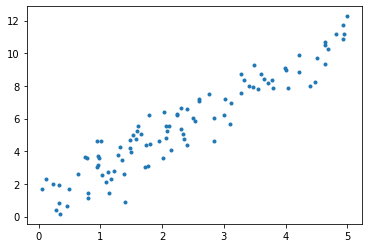

In [20]:
plt.plot(X[:,0],X[:,1],'.')
plt.show()

In [21]:
def center(X):
    '''
    function to center the data around the mean
    modify the return value to return the modified matrix
    '''
    # YOUR CODE HERE
    Y = X.copy()
    Y = Y - np.mean(Y, axis = 0)
    return Y

In [22]:
#DO NOT ALTER THIS CELL
#HIDDEN TEST CASES FOR center


In [23]:
def find_covariance_matrix(X):
    '''
    Find the covariance matrix of X
    USE only the following formula for covariance: 1/M dot_product(transpose(X),X) where X is MxN
    M is the number of observations and N is the number of features and X is column centered.
    Return the final matrix
    '''
    
    # YOUR CODE HERE
    M, N = X.shape
    covariance_matrix = X.T.dot(X) / M
    return covariance_matrix

In [24]:
#DO NOT ALTER THIS CELL
#HIDDEN TEST CASES FOR find_covariance_matrix


Now let's plot the centered data and the eigen vectors in the same figure

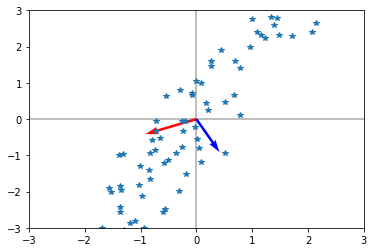

In [25]:
# We will use the simulated X, the one we generated in one of the above cells
X_centered = center(X)
covariance = find_covariance_matrix(X_centered)
eigenVals, eigenVecs = find_eigen_decomposition(covariance)

plot_vectors(eigenVecs, ['red', 'blue'])
plt.plot(X_centered[:,0], X_centered[:,1], '*')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [26]:
def two_dimensional_pca(X_centered, eigenValues, eigenVecs):
    '''
    using X_centered, eigenValues, eigenVecs as obtained above
    apply pca on X_centered and chose the principal component
    return the new matrix
    '''
    
    # YOUR CODE HERE
    eigenvec_sorted = eigenVecs[:, eigenValues.argsort()[::-1]]
    print(eigenvec_sorted)
    max_eigenvec = eigenvec_sorted[:, 0]
    print(max_eigenvec)
    transformed_X = apply_linear_transform(X_centered, max_eigenvec)
    print(X_centered.shape, max_eigenvec.shape, transformed_X.shape)
    return transformed_X
    #return max_eigenvec

[[-0.41444129 -0.91007605]
 [-0.91007605  0.41444129]]
[-0.41444129 -0.91007605]
(100, 2) (2,) (100,)


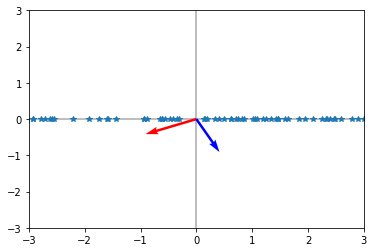

In [27]:
X = two_dimensional_pca(X_centered, eigenVals, eigenVecs)
plt.plot(X[:], np.zeros(100), '*')
plt.xlim(-3, 3)
plot_vectors(eigenVecs, ['red', 'blue'])
plt.ylim(-3, 3)
plt.show()

In [28]:
#DO NOT ALTER THIS CELL
#HIDDEN TEST CASES FOR two_dimensional_pca on the data X created in the above cells


**Inline Questions:** <br> 
1) Can you identify the color of the line which points to the direction of maximum variance? <br>
2) Look at the Graph below and explain if PCA can be applied on this dataset or not? Do give reason. <br>
3) Can you apply PCA to categorical variables? (Answer to this will give you hints for the next excercise)

![Plot](images/pca_inline.png)

Answers:

## PCA on a large dataset
## About Dataset:
Task: Reducing the dimesions for predicting house prices.
The dataset is stored in the file **'data_pca.csv'**, it has 15 numerical columns and 2 categorical columns (columns are labeled as $X0$....$X16$), in an imaginary world, all these columns have certain significance towards prediciton of final house prices. Your task is simple, apply PCA to reduce the number of dimensions. 

Now implement the following functions for getting the final dataset with reduced dimensions. Keep the top $k (k=0...10)$ principal components.

In [39]:
def read_data(name):
    '''
    read the CSV file and return the corresponding dataframe
    don't forget to remove the index column (check the name properly)
    '''
    # YOUR CODE HERE
    data = pd.read_csv(name, index_col=0)
    data.drop([data.columns[0], data.columns[15], data.columns[16]], axis=1, inplace=True)
    return data

In [40]:
#input the path top the CSV file
#DO NOT ALTER THIS CELL
#HIDDEN TEST CASES FOR read_data

PATH_TO_CSV_FILE = './data_pca.csv'

In [57]:
def apply_pca(data,k):
    '''
    data: a pandas data frame
    Implement PCA on the dataset and return the transformed dataset as a pandas dataframe
    keep k pricipal components
    remember the dataset MUST have the chosen components and the columns you decide to exclude 
    from PCA calculation.
    The returned dataframe should NOT have the index column
    The returned dataframe should have similar column names as original and must be in the 
    SAME ORDER as in the original data, example : if X0 and X1 are chosen then X0 must appear
    appear before X1 in the returned frame as it appears before in the original frame as well.
    
    Try to verify the function on your own :)
    '''
    # YOUR CODE HERE
    X = data.to_numpy()
    X_centered = center(X)
    covariance = find_covariance_matrix(X_centered)
    eigenVals, eigenVecs = find_eigen_decomposition(covariance)
    eigenvec_sorted = eigenVecs[:, eigenVals.argsort()[::-1]]
    #print(eigenvec_sorted)
    max_eigenvec = eigenvec_sorted[:, 0:k]
    #print(max_eigenvec)
    transformed_X = apply_linear_transform(X_centered, max_eigenvec)
    dataframe = pd.DataFrame(transformed_X, columns=['X' + str(i) for i in range(k)])
    #print(X_centered.shape, max_eigenvec.shape, transformed_X.shape)
    return dataframe

In [58]:
PATH_TO_CSV_FILE = './data_pca.csv'
data = pd.read_csv(PATH_TO_CSV_FILE)
#DO NOT ALTER THIS CELL
#HIDDEN TEST CASES FOR apply_pca

In [65]:
#apply_pca(read_data(PATH_TO_CSV_FILE).to_numpy(), 2)
df = read_data(PATH_TO_CSV_FILE)
apply_pca(df, 7)

,X0,X1,X2,X3,X4,X5,X6
0,-34380.720092,-19.916071,-25.999007,24.333052,0.551740,-4.739041,-3.146913
1,54917.279980,2.156109,9.871713,1.988709,-6.591797,20.135426,-0.794826
2,67430.279630,9.418160,-12.656431,-3.924596,10.649068,16.679504,-8.473162
3,25163.280835,43.226273,-20.696815,3.686998,-17.115547,6.205580,-0.316467
4,231390.279124,-19.249742,9.520289,38.449475,18.589652,7.429057,-10.057036
5,111858.279293,-28.778168,16.218546,22.400632,9.428420,20.305955,8.724478
6,117305.280427,-19.261829,-12.313204,6.528814,-16.237904,4.268984,-10.751995
7,-217304.720228,25.384232,15.545914,7.747207,1.863595,9.369977,9.334811
8,189943.280047,21.591800,-37.101594,-2.125398,11.463349,0.069856,-5.116867
9,-132591.720338,17.102211,27.792708,2.079495,9.115612,-20.027135,-9.819101
